In [1]:
import pandas as pd
from market_data import KalshiClient, KalshiAnalyzer

Define tickers

In [2]:
series_ticker = "KXOSCARPIC"  # Oscar for Best Picture ?
market_ticker = "KXOSCARPIC-26-HAM"

In [3]:
series_ticker = "KXALIENS"  # Will the U.S. confirm that aliens exist before 2027?
market_ticker = None

# Serie Ticker 

In [4]:
client = KalshiClient(series_ticker=series_ticker)
series_data = client.get_series_information()

Series Title: Aliens
Frequency: annual
Category: Science and Technology


Market data now

Get Events : https://docs.kalshi.com/api-reference/events/get-events

In [5]:
markets_data = client.get_markets_data()


Markets in KXALIENS series (status=open):
- KXALIENS-27: Will the U.S. confirm that aliens exist before 2027?
  Event: KXALIENS-27
  Yes Ask: 17¢ | No Ask: 84¢ | Volume: 2353597

Event Details:
Title: Will the U.S. confirm that aliens exist before 2027?
Category: Science and Technology


# Contract Data

In [6]:
analyzer = KalshiAnalyzer(series_ticker=series_ticker, market_ticker=market_ticker)

Get Market Orderbook : https://docs.kalshi.com/api-reference/market/get-market-orderbook

In [7]:
orderbook_data = analyzer.get_orderbook_data()


Orderbook for KXALIENS-27:
YES BIDS:
  Price: 1¢, Quantity: 106028
  Price: 2¢, Quantity: 32553
  Price: 3¢, Quantity: 21000
  Price: 4¢, Quantity: 6000
  Price: 5¢, Quantity: 6291

NO BIDS:
  Price: 1¢, Quantity: 50040
  Price: 2¢, Quantity: 10102
  Price: 3¢, Quantity: 10000
  Price: 4¢, Quantity: 13233
  Price: 5¢, Quantity: 125


Get Price Data : https://docs.kalshi.com/api-reference/market/get-market-candlesticks

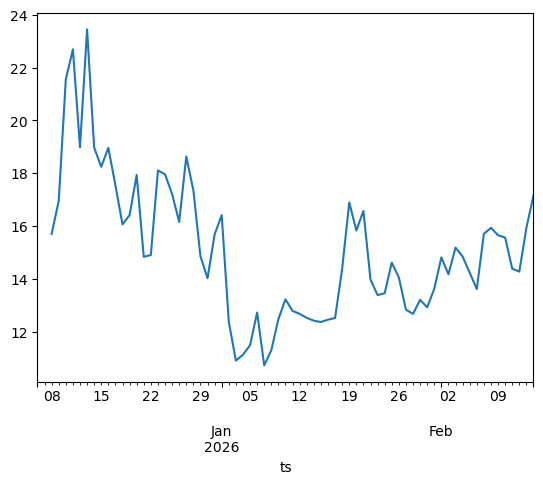

In [8]:
prices = analyzer.get_price_data(
    start_ts="2025-09-23",
    end_ts="2026-02-15",
    plot=True,
)

In [9]:
if market_ticker == "KXOSCARPIC-26-HAM":
    ref_prices = pd.read_csv("data/ref_data/kalshi-price-history-kxoscarpic-26-day.csv")
    ref_prices["timestamp"] = pd.to_datetime(ref_prices["timestamp"], utc=True)
    ref_prices = ref_prices.set_index("timestamp")["Hamnet"]

    diff_prices = prices - ref_prices
    print(f"Missing values in the dataset {diff_prices.isna().mean()}")
    print(f"Comparaison error with Kalshi website {(diff_prices.abs() > 1e-1).mean()}")

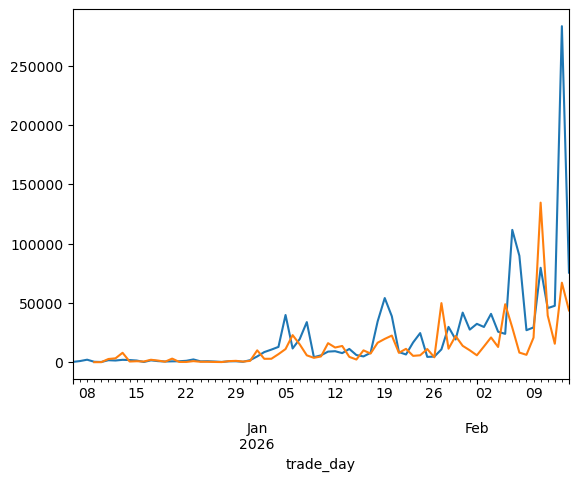

In [10]:
volumes = analyzer.get_trades_data(
    start_ts="2025-09-23",
    end_ts="2026-02-15",
    plot=True,
)